# Using Principal Component Analysis for Digital Signal Processing
### Ayush Chakraborty, Allyson Hur, Cherry Pham, Suki Sacks

## Abstract
Digital Signal Processing (DSP) involves manipulating and analyzing signals to extract meaningful information. DSP normally relies on predefined algorithms and mathematical models for signal-processing tasks. This project explores the integration of principal component analysis (PCA) into DSP to enhance its capabilities and adaptability.

The objective of this project is to investigate how PCA can be used for tasks such as signal denoising, modulation recognition, and feature extraction. By utilizing datasets containing diverse signal patterns, the project aims to develop a deeper understanding of the adaptability and versatility of PCA in regards to various signal processing challenges.

## Implementation

In [ ]:
from pca import *


## Code Breakdown

In [1]:
from pca_helpers import generate_signal
message_txt = "Hello, world."
message_bits, message_bits_txt = generate_signal(message_txt)


T: Hello, world. -> 01001000011001010110110001101100011011110010110000100000011101110110111101110010011011000110010000101110
R: Hello, world. -> 01001000011001010110110001101100011011110010110000100000011101110110111101110010011011000110010000101110
tx_avg_power=0.2692567198366432
noise_power=0.001
snr=269.2567198366432
ber=0.0
T: Hello, world. -> 01001000011001010110110001101100011011110010110000100000011101110110111101110010011011000110010000101110


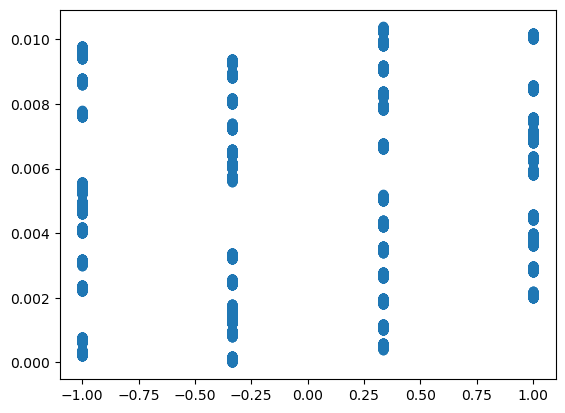

In [6]:
from pca_helpers import generate_symbols, batched, translate_message_bits
import matplotlib.pyplot as plt

bits_per_symbol = 2
symbols_of_t = generate_symbols(bits_per_symbol)

x, t = translate_message_bits(bits_per_symbol, message_bits_txt)


In [ ]:
y, x_modulated = transmit_signal(x)


In [ ]:
coefs, principal_eig_vec = compute_eigen_symbols(symbols_of_t)


In [ ]:
x_hat = decode_signal(pca_coef_to_symbol, principal_eig_vec, y)


## What is Principle Component Analysis (PCA)?
PCA is a dimensionality reduction technique used to transform the data into a new coordinate system in which the axes (basis vectors) are equivalent to the directions of maximum variance. The first principle component is the direction in which our symbols vary the most. In this case, our four symbols are -1, -0.3, 0.3, and 1. PCA will map these symbols into 1D representations of the variation. 

## Why don't we need to modulate our signal when using PCA? 

When running through our "base case" channel with just Gaussian noise, we did not have to demodulate when peforming PCA on our 4-PAM to get a good bit error rate (BER). In fact, when we demodulated, it actually increased the BER. Since we are projecting our different symbols into eigenvectors to separate them by frequency, we don't have to demodulate the signal to separate the various properties of our message because PCA has already done that for us! This is the same case with the Fourier Transform, which already separates the various sinusoidal functions into different frequencies. 

### A little more about the Fourier Transform...
The Fourier Transform transforms a function of time into its frequency components by representing a function as a sum of sin and cosine waves (sinusoidal functions) with different frequencies. These waves function as the basis vectors in the frequency domain, representing different frequencies in the signal. 